In [1]:
from imports import *

In [77]:
with open(BUS_STOP_ROUTE_LIST_PATH, 'r') as f:
    reader = f.readlines()

routes = [route.strip() for route in reader]
routes[:5]

['7-ISBT-17 To New Maloya Colony Via SEC 22/23, SEC 38/25',
 '7-New Maloya Colony To ISBT 17 Via Maloya, Sector 38/25, Sector 23 MKT',
 '01-CTU Workshop To New Maloya Colony Via Dadu Majra village',
 '01-New Maloya Colony To ISBT 17 Via PGI, Sector 16 Hospital',
 '01-Mani Majra To New Maloya Colony Via Railway Station, ISBT-17, PGI']

In [82]:
def clean_tuple(data):
    return tuple(
        item.strip() if isinstance(item, str) else [i.strip() for i in item] if isinstance(item, list) else item
        for item in data
    )

def extract_stops(entry):
    route_number_idx = entry.find("-", 0, len(entry))

    route_number = entry[0 : route_number_idx]
    route_name = entry[route_number_idx+1 ::]

    start_stop = None
    end_stop = None
    via_stops = None

    route_name = route_name.lower()

    if "via" in route_name:
        sub_strs = route_name.split("via")
        start_stop, end_stop = re.split(r'\bto\b', sub_strs[0])

        via_stops = sub_strs[1].split(",")
    else:
        sub_strs = re.split(r'\bto\b', route_name)
        start_stop, end_stop = sub_strs[0], sub_strs[1]
    
    return clean_tuple((route_number, start_stop, end_stop, via_stops))

In [83]:
res = {
    'route_number': [],
    'start_stop': [], 
    'end_stop': [], 
    'via_stops': []
}

error_count = 0
for i, route in enumerate(routes):
    try:
        output = extract_stops(route)
        res['route_number'].append(output[0])
        res['start_stop'].append(output[1])
        res['end_stop'].append(output[2])
        res['via_stops'].append(output[3])
    except:
        print(i, route)
        error_count += 1

error_count

0

In [84]:
df = pd.DataFrame(res)
df

,route_number,start_stop,end_stop,via_stops
0,7,isbt-17,new maloya colony,"[sec 22/23, sec 38/25]"
1,7,new maloya colony,isbt 17,"[maloya, sector 38/25, sector 23 mkt]"
2,01,ctu workshop,new maloya colony,[dadu majra village]
3,01,new maloya colony,isbt 17,"[pgi, sector 16 hospital]"
4,01,mani majra,new maloya colony,"[railway station, isbt-17, pgi]"
...,...,...,...,...
376,38AS,isbt 17,new airport,"[i.s.b.t. 43, sohana]"
377,C551E,pgi,isbt 43,[isbt 17]
378,C551E,isbt 43,pgi,"[sec22/17, 16 hospital, new opd, pgi]"
379,C551E,pgi,workshop,None


In [85]:
df[df["via_stops"].isna()]

,route_number,start_stop,end_stop,via_stops
8,06,workshop,isbt 43,None
9,06,isbt - 43,workshop,None
10,06,depot 3,new maloya colony,None
16,08,phase 11,isbt 22/17,None
19,08,isbt 17,phase 11,None
...,...,...,...,...
329,30B,sector 22/17,isbt 43,None
330,30B,sector 4 (panchkula),isbt 43,None
359,I1E,24 - isbt 43,isbt 17,None
362,I1E,24 - isbt 17,isbt 43,None


In [86]:
df.to_csv("../scarping_scripts/scarped_data/processed_data/bus_routes_start_end.csv")

# Trying to Plot the bus routes

No path found for route 17 (behlana → isbt 43). Skipping.
No path found for route 26 (eco city → isbt-17). Skipping.
No path found for route 26 (eco city → ctu workshop). Skipping.
No path found for route 26 (dhakoli → pgi). Skipping.
No path found for route 26 (dhakoli → workshop). Skipping.
No path found for route 26 (eco city → dhakoli). Skipping.
No path found for route 2C (railway station → mani majra). Skipping.
No path found for route 2F (workshop → platinum homes/sanauli). Skipping.
No path found for route 2F (pgi → platinum homes/sanauli). Skipping.
No path found for route 2F (railway station → platinum homes/sanauli). Skipping.
No path found for route 2F (isbt 17 → platinum homes/sanauli). Skipping.
No path found for route 30 (isbt 43 → nada sahib). Skipping.
No path found for route 30 (sector 17 → nada sahib). Skipping.
No path found for route 30 (railway crossing → nada sahib). Skipping.
No path found for route 31 (omex tower → pgi). Skipping.
No path found for route 31 (om

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '']


No path found for route 219 (isbt 17 → bhabat). Skipping.
No path found for route 219 (dhanas → air force station). Skipping.
No path found for route 239 (lake → isbt 43). Skipping.
No path found for route 28A (rani majra → isbt 43). Skipping.
No path found for route 28A (sarangpur barrier → rani majra). Skipping.
No path found for route 28A (isbt- 43 → rani majra). Skipping.
No path found for route 30B (sector 4 panchkula → sector 26). Skipping.
No path found for route 30B (isbt 43 → ramgarh). Skipping.
No path found for route 30B (ramgarh → sector 22/17). Skipping.
No path found for route 30B (isbt 17 → ramgarh). Skipping.
No path found for route 30B (ramgarh → sector 26 grain mkt). Skipping.
No path found for route 32B (panchkula bus stand → housing borad). Skipping.
Skipping route Unnamed: 0                 355
route_number               70A
start_stop          sp barrier
end_stop          jayanti devi
via_stops       [parch, sionk]
Name: 355, dtype: object due to missing coordinat

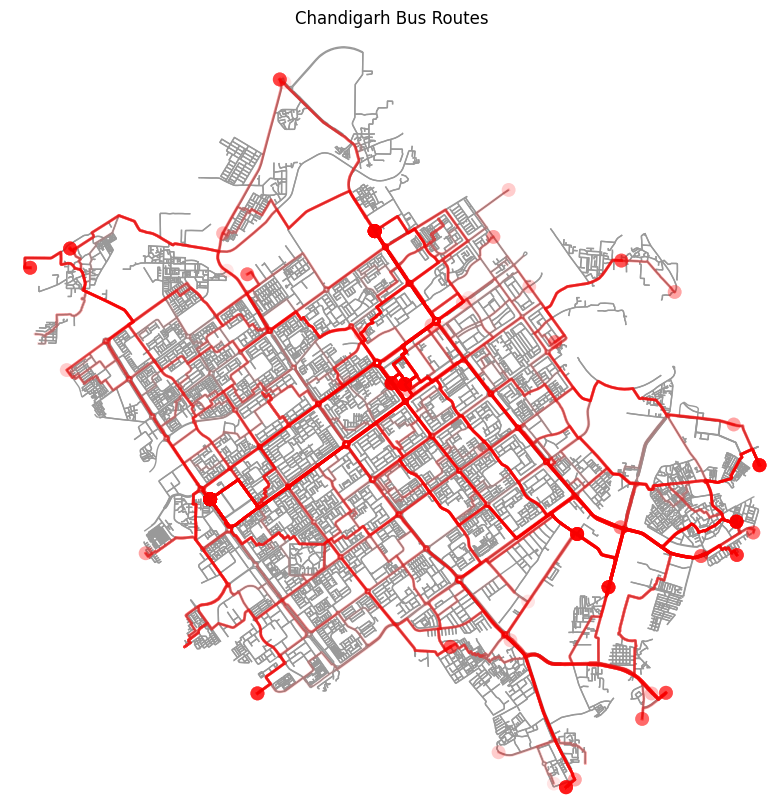

In [7]:
# Load the datasets
routes_df = pd.read_csv("../scarping_scripts/scarped_data/processed_data/bus_routes_start_end.csv")
stops_df = pd.read_csv("../" + BUS_STOP_LOCATIONS_PATH)

# Convert 'name' to lowercase for better matching
stops_df["name"] = stops_df["name"].str.lower()
routes_df["start_stop"] = routes_df["start_stop"].str.lower()
routes_df["end_stop"] = routes_df["end_stop"].str.lower()
routes_df["via_stops"] = routes_df["via_stops"].apply(lambda x: eval(x) if isinstance(x, str) else [])

failed_counter = 0

# Function to get latitude and longitude of a stop with fuzzy matching
def get_coords(stop_name, threshold=85):
    # Normalize stop name (lowercase, remove extra spaces and dashes)
    stop_name = stop_name.lower().replace("-", " ").strip()
    
    # Get best match from stops dataset
    match = process.extractOne(stop_name, stops_df["name"])
    
    if match:  # Ensure a match was found
        best_match, score, *_ = match  # Unpack first two values
        
        # If match score is high enough, return its coordinates
        if score >= threshold:
            match_row = stops_df[stops_df["name"] == best_match].iloc[0]
            return match_row["lat"], match_row["long"]
    
    return None  # Return None if no good match found

# Load the road network for Chandigarh
G = ox.graph_from_place("Chandigarh, India", network_type="drive")

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 10))
ox.plot_graph(G, ax=ax, node_size=0, bgcolor="white", show=False, close=False)

# Iterate through each route and plot paths
for _, route in routes_df.iterrows():
    start_coords = get_coords(route["start_stop"])
    end_coords = get_coords(route["end_stop"])
    
    if not start_coords or not end_coords:
        print(f"Skipping route {route} due to missing coordinates")
        failed_counter += 1
        continue

    via_coords = [get_coords(stop) for stop in route["via_stops"]]
    via_coords = [v for v in via_coords if v is not None]  # Remove None values

    # Find nearest nodes on the OSM graph
    try:
        start_node = ox.distance.nearest_nodes(G, start_coords[1], start_coords[0])
        end_node = ox.distance.nearest_nodes(G, end_coords[1], end_coords[0])
        via_nodes = [ox.distance.nearest_nodes(G, v[1], v[0]) for v in via_coords]

        # Compute route
        path = [start_node]
        for v_node in via_nodes:
            path += nx.shortest_path(G, path[-1], v_node, weight="length")[1:]  # Avoid duplicate nodes
        path += nx.shortest_path(G, path[-1], end_node, weight="length")[1:]

        # Plot on existing figure
        ox.plot_graph_route(G, path, route_linewidth=2, node_size=0, ax=ax, show=False, close=False, route_alpha=0.1)

    except nx.NetworkXNoPath:
        print(f"No path found for route {route['route_number']} ({route['start_stop']} → {route['end_stop']}). Skipping.")
        failed_counter += 1

# Final plot adjustments
ax.set_title("Chandigarh Bus Routes")
print(failed_counter)
plt.show()

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '']


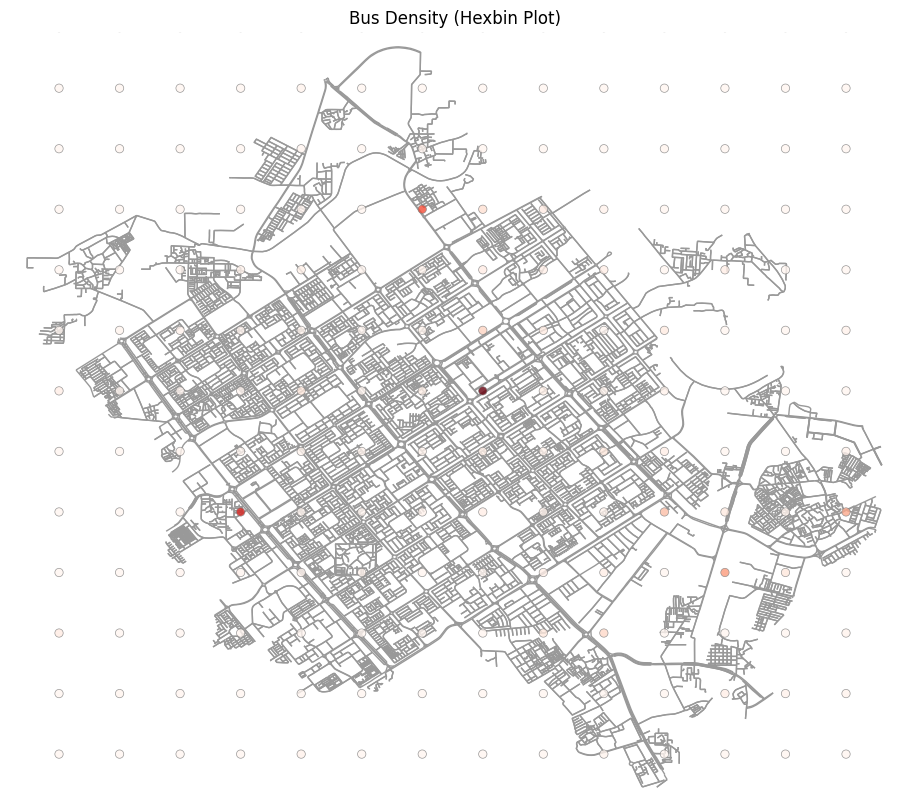

In [8]:
# Collect all coordinates (start, end, via stops)
all_coords = []

for _, route in routes_df.iterrows():
    start_coords = get_coords(route["start_stop"])
    end_coords = get_coords(route["end_stop"])
    via_coords = [get_coords(stop) for stop in route["via_stops"]]

    for coords in [start_coords, end_coords] + via_coords:
        if coords:
            all_coords.append(Point(coords[1], coords[0]))  # (longitude, latitude) for shapely

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=all_coords)

# Define hexagonal grid
xmin, ymin, xmax, ymax = gdf.total_bounds
hex_size = 0.01  # Adjust for detail level
x_bins = np.arange(xmin, xmax, hex_size)
y_bins = np.arange(ymin, ymax, hex_size)
hexagons = [Point(x, y) for x in x_bins for y in y_bins]

# Count points per hexagon
heatmap = gpd.GeoDataFrame(geometry=hexagons)
heatmap["count"] = heatmap.geometry.apply(lambda hex: sum(gdf.geometry.within(hex.buffer(hex_size / 2))))

# Plot hexbin map
fig, ax = plt.subplots(figsize=(12, 10))
ox.plot_graph(G, ax=ax, node_size=0, bgcolor="white", show=False, close=False)
heatmap.plot(column="count", cmap="Reds", linewidth=0.5, edgecolor="gray", alpha=0.8, ax=ax)
ax.set_title("Bus Density (Hexbin Plot)")
plt.show()

In [9]:
# Extract edges from the graph for visualization
edges = []
for u, v, data in G.edges(data=True):
    if "geometry" in data:
        # If the edge has a geometry attribute, use its coordinates
        xs, ys = data["geometry"].xy
        edges.append(list(zip(xs, ys)))
    else:
        # Otherwise, use the node coordinates
        u_lat, u_lon = G.nodes[u]["y"], G.nodes[u]["x"]
        v_lat, v_lon = G.nodes[v]["y"], G.nodes[v]["x"]
        edges.append([(u_lat, u_lon), (v_lat, v_lon)])

# Collect all bus stop coordinates for the heatmap
heatmap_data = []

for _, route in routes_df.iterrows():
    start_coords = get_coords(route["start_stop"])
    end_coords = get_coords(route["end_stop"])
    via_coords = [get_coords(stop) for stop in route["via_stops"]]
    
    # Add valid coordinates to the heatmap data
    for coords in [start_coords, end_coords] + via_coords:
        if coords:
            heatmap_data.append([coords[0], coords[1]])

# Create a Folium map centered on Chandigarh
m = folium.Map(location=[30.7333, 76.7794], zoom_start=12)

# Add the HeatMap layer
HeatMap(heatmap_data, radius=15, blur=10, min_opacity=0.2).add_to(m)

# Add the road network to the Folium map
for edge in edges:
    folium.PolyLine(edge, color="black", weight=1, opacity=0.5).add_to(m)

# Save and show the map
m.save("bus_density_with_network.html")
print("Map saved as 'bus_density_with_network.html'. Open it in a browser to view.")

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '']


Map saved as 'bus_density_with_network.html'. Open it in a browser to view.
